# Qiskit入門

In [1]:
# Qiskitライブラリーを導入
from qiskit import *
from qiskit.visualization import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}

# 1) 1量子ビット回路
## 1.1) Xゲート

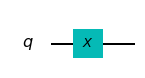

In [3]:
q = QuantumCircuit(1)    # １量子ビット回路を用意

q.x(0)   # Xゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

初期状態は|0>にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

[0.+0.j 1.+0.j]


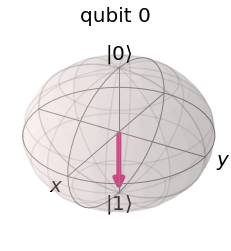

In [4]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

縦ベクトルが横ベクトルになり、複素数表示で表示されています。

## 1.2) Hゲート

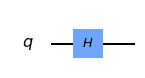

In [5]:
q = QuantumCircuit(1)    # １量子ビット回路を用意

q.h(0)   # Hゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.707+0.j 0.707+0.j]


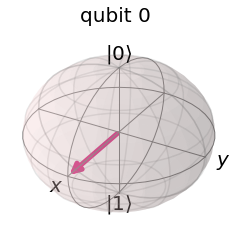

In [6]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)=|+\rangle$ です。




つまり、$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。この状態は、$|+\rangle$とも書きます。

## 1.3) Z軸回転

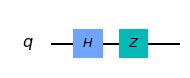

In [7]:
q = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
q.h(0)

# 次にZゲートを0番目の量子ビットに操作します。
q.z(0)

q.draw(output="mpl")    # 回路を描画

[ 0.707+0.j -0.707+0.j]


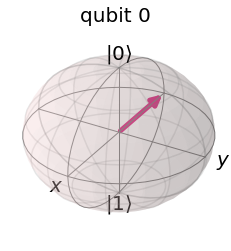

In [8]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$ZH|0\rangle= Z|+\rangle
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0 \\\
0 & -1
\end{pmatrix}\begin{pmatrix}
1 \\\
1
\end{pmatrix}  
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)=|-\rangle$


$|+\rangle$に$Z$ゲートを実行した結果、$|1\rangle$の符号がマイナスになります。この状態は$|-\rangle$とも書きます。

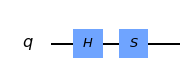

In [9]:
q = QuantumCircuit(1)    # １量子ビット回路を用意 

q.h(0)    # Hゲートを0番目の量子ビットに操作します。
q.s(0)    # 次にSゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.707+0.j    0.   +0.707j]


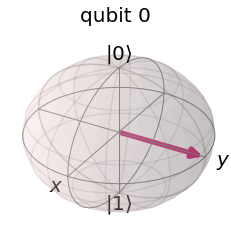

In [10]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$SH|0\rangle= S|+\rangle
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0 \\\
0 & i
\end{pmatrix}\begin{pmatrix}
1 \\\
1
\end{pmatrix}  
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
i
\end{pmatrix}
=\begin{pmatrix}
0.707 \\\
0.707i
\end{pmatrix} $


$|+\rangle$に$S$ゲートを実行すると、位相が$\pi /2$回転します。

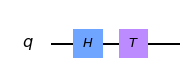

In [11]:
q = QuantumCircuit(1)    # １量子ビット回路を用意 

q.h(0)    # Hゲートを0番目の量子ビットに操作します。
q.t(0)    # 次にTゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.707+0.j  0.5  +0.5j]


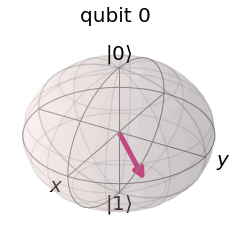

In [12]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$TH|0\rangle= T|+\rangle
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0 \\\
0 & e^{i\pi/4}
\end{pmatrix}\begin{pmatrix}
1 \\\
1
\end{pmatrix}  
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
e^{i\pi/4}
\end{pmatrix}
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
\cos(\pi/4)+i\sin(\pi/4)
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.5+0.5i
\end{pmatrix}$


$|+\rangle$に$T$ゲートを実行すると、位相が$\pi /4$回転します。

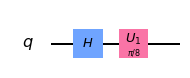

In [13]:
q = QuantumCircuit(1)    # １量子ビット回路を用意 

q.h(0)    # Hゲートを0番目の量子ビットに操作します。
q.u1(np.pi/8,0)    # 次にU1ゲートを0番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.707+0.j    0.653+0.271j]


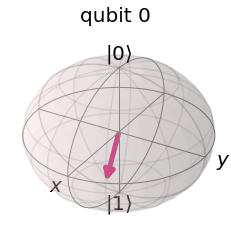

In [14]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$U_1(\pi/8)H|0\rangle= U_1(\pi/8)|+\rangle
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0 \\\
0 & e^{i\pi/8}
\end{pmatrix}\begin{pmatrix}
1 \\\
1
\end{pmatrix}  
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
e^{i\pi/8}
\end{pmatrix}
=\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
\cos(\pi/8)+i\sin(\pi/8)
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.653+0.271i
\end{pmatrix}$


$|+\rangle$に$U_1(\pi/8)$ゲートを実行すると、位相が$\pi /8$回転します。

# 2) 2量子ビット回路
## 2.1) $|++\rangle$の状態をつくる

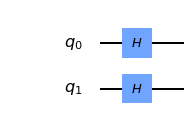

In [15]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意  

q.h(0)    # Hゲートを0番目の量子ビットに操作します。
q.h(1)    # Hゲートを1番目の量子ビットに操作します。

q.draw(output="mpl")    # 回路を描画

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


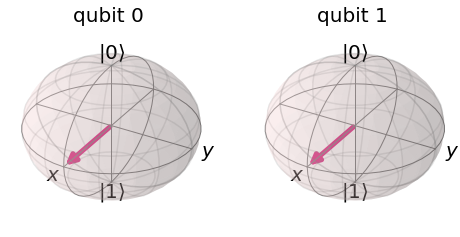

In [16]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

初期値 $|0\rangle\otimes|0\rangle=|00\rangle$に、$H$をそれぞれ操作させることで均等な重ね合わせの状態になります。

$|++\rangle=H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) =\frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


## 2.2) 制御U1ゲート

$CU_1$ゲート（制御$U_1$ゲート、コントロール$U_1$ゲートなどとも呼ばれます）は、2量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットに$U_1$ゲートをかけます。

q0が$|1\rangle$、q1が$|+\rangle$の場合を$CU_1(\pi/2)$ゲートをかけてみましょう。

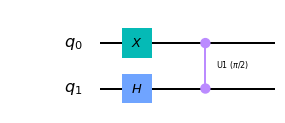

In [17]:
q = QuantumCircuit(2)    # 2量子ビット回路を用意

# q0=|1>, q1=|+>の場合：
q.x(0)
q.h(1)

# CU1ゲートの制御ビットをq0、目標ビットをq1、角度をpi/2にセットします。
q.cu1(np.pi/2,0,1)

q.draw(output="mpl")    # 回路を描画

[0.   +0.j    0.707+0.j    0.   +0.j    0.   +0.707j]


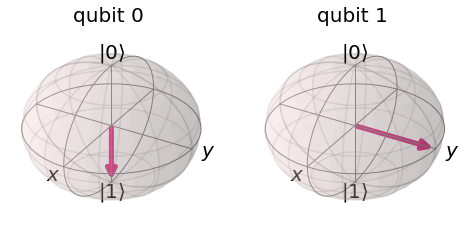

In [18]:
# 状態ベクトルシミュレーターの実行
backend = Aer.get_backend('statevector_simulator')
result = execute(q, backend).result().get_statevector(q, decimals=3)
print(result)

plot_bloch_multivector(result)    # ブロッホ球の表示

$|+1\rangle$ に$CU_1(\pi/2)$ゲートを操作すると、以下のようになります。

$U_1(\pi/2)|+\rangle \otimes I |1\rangle 
=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}
=\frac{1}{\sqrt{2}}
\begin{bmatrix}
0 \\
1 \\
0 \\
i
\end{bmatrix} $

注意！：Qiskitでは、最下位ビット(LSB)が右端で、量子力学の教科書とは逆です。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットになります。$|+1\rangle$ とは、q0が1で、q1が+を表しています。
